# Esercitazione 1

In questa esercitazione si vuole verificare il corretto funzionamento del generatore di numeri pseudo-casuali che verrà usato nelle restanti esercitazioni.

## Esercizio 1

Il primo test consiste nel verificare che venga campionata correttamente una densità di probabilità uniforme nell'intervallo $[0,1]$. Il valore atteso dovrebbe essere $<r> = 0.5$ e la varianza $\sigma^2 = 1/12$.

Vengono campionati $M = 10000$ punti, divisi in $N = 100$ blocchi. Di ogni blocco viene calcolata la media e nel grafico è rappresentata la variazione della media progressiva all'aumentare dei numeri di blocchi (con il relativo errore).

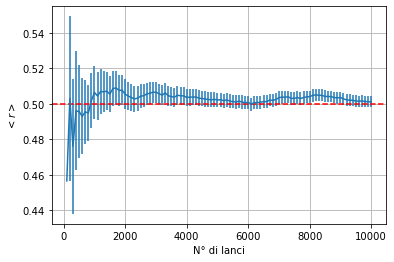

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, f, error = np.loadtxt("./Esercizio_1/out1", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(0.5, color = 'red', linestyle = 'dashed')
plt.xlabel('N° di lanci')
plt.ylabel('$<r>$')
plt.grid(True)

plt.show()

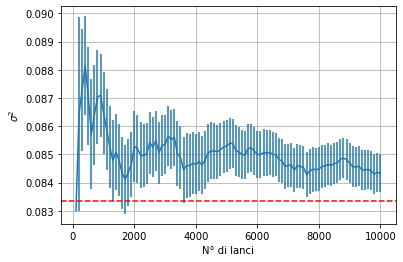

In [3]:
x, f, error = np.loadtxt("./Esercizio_1/out2", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(1/12, color = 'red', linestyle = 'dashed')
plt.xlabel('N° di lanci')
plt.ylabel('$\sigma^2$')
plt.grid(True)

plt.show()

Per una verifica più quantitativa, conviene calcolare il Chi-quadro, una variabile che misura la dicrepanza tra dati osservati e i loro valori attesi. La sua definizione è la seguente:

$$ \chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}, $$

Dove $O_i$ sono i valori osservati e $E_i$ i corrispettivi attesi.

Procediamo come segue: dividiamo l'intervallo $[0,1]$ in $M = 100$ sottointervalli della stessa dimensione. Per ogni sottointervallo, generiamo $n = 10000$ numeri (pseudo)casuali e contiamo quanti cadono all'interno dell'intervallo. Poiché ci aspettiamo che la distribuzione sia uniforme, il numero di conteggi attesi è $E_i = np = n/M$. 

Chi^2 = 80.94999999999999


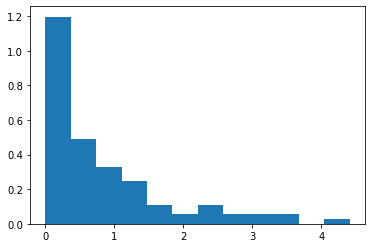

In [13]:
x, f = np.loadtxt("./Esercizio_1/out3", usecols=(0,1), delimiter=',', unpack='true')
n_bins = 12
plt.hist(f, n_bins, density=True)

Chi = np.sum(f)
print('Chi^2 = ' + str(Chi))

plt.show()

È stato anche prodotto un istogramma riempito coi valori trovati di $\chi^2$ in ogni sottointervallo (in totale $M$ valori). La stima finale per il chi-quadro è la somma di questi valori, secondo la formula scritta sopra.

Ci aspettiamo che in media $(n_i - n/M) \approx n/M$, perciò che $\chi^2 \approx 100$.

## Esercizio 2

Vogliamo ora provare a campionare distribuzioni di probabilità che non siano quella uniforme, usando l'inversione della cumulativa. Implementiamo due metodi che campionino la funzione esponenziale e una lorentziana.

### Distribuzione esponenziale

La densità di probabilità che vogliamo campionare è $p(x) = e^{-x}$, $x \geq 0$. La cumulativa è la funzione $F(x) = 1-e^{-x}$, la cui inversa è $F^{-1}(y) = -\ln{(1-y)}$.

Se $y$ è distribuito uniformemente tra $0$ e $1$, allora $x = F^{-1}(y)$ è distribuito secondo la distribuzione esponenziale. Nel grafico in blu è presente un istogramma riempito con $M = 10000$ punti estratti dalla distribuzione esponenziale.

Verifichiamo inoltre il teorema del limite centrale. Date $N$ variabili aleatorie indipendenti $x_i$ e identicamente distribuite, se il valore di apsettazione di ciascuna è lo stesso
$$ <x_1> = <x_2> = \cdots = <x_N> \equiv \mu ,$$
se esiste il secondo momento e sono uguali le quantità seguenti
$$ <x_1^2> - <x_1>^2 = <x_2^2> - <x_2>^2 = \cdots = <x_N^2> - <x_N>^2 \equiv \sigma^2,$$

allora la variabile aleatoria

$$ A_N = \frac{1}{N}\sum_{i = 1}^{N}x_i $$
* ha valore di aspettazione $<A_N> = \mu$;
* ha varianza $\sigma_A^2 = \sigma^2/N$;
* ha una distribuzione di probabilità limite che è la funzione gaussiana
$$p_N(A_N) \rightarrow \frac{1}{\sqrt{2\pi\sigma_A^2}}e^{-\frac{(A_N-\mu)^2}{2\sigma_A^2}} \text{ per } n\rightarrow\infty$$.

Nei grafici in rosso, giallo e verde sono rappresentati gli istogrammi con $M$ realizzazioni della variabile $A_N$ per diversi valori di $N$.

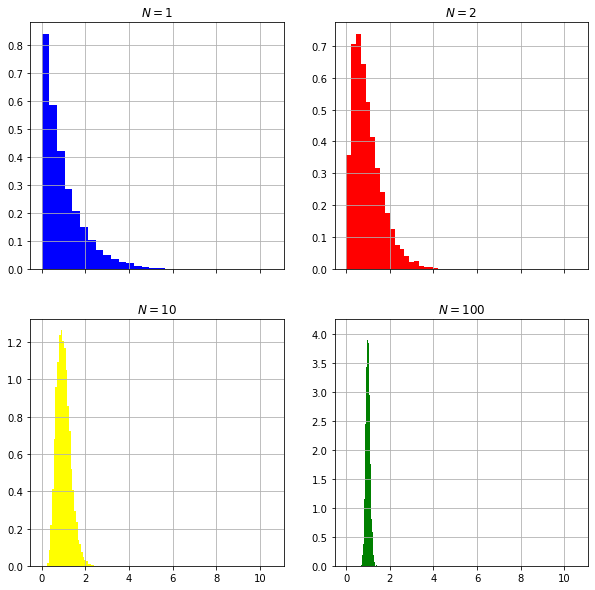

In [19]:
n1, n2, n10, n100 = np.loadtxt("./Esercizio_2/out4", usecols=(1,2,3,4), delimiter=',', unpack='true')
n_bins = 30

fig, ((histo1,histo2), (histo10,histo100)) = plt.subplots(2,2, sharex = True)
fig.set_figheight(10)
fig.set_figwidth(10)

histo1.hist(n1, n_bins, density=True, color = 'blue')
histo2.hist(n2, n_bins, density=True, color = 'red')
histo10.hist(n10, n_bins, density=True, color = 'yellow')
histo100.hist(n100, n_bins, density=True, color = 'green')

histo1.grid(); histo1.set_title('$N = 1$')
histo2.grid(); histo2.set_title('$N = 2$')
histo10.grid(); histo10.set_title('$N = 10$')
histo100.grid(); histo100.set_title('$N = 100$')

plt.show()

Si osserva chiaramente l'approssimazione alla Gaussiana centrata in $\mu = 1$ (valore di aspettazione della distribuzione esponenziale).

### Distribuzione uniforme

Verifichiamo i risultati dello stesso teorema anche con la distribuzione uniforme.

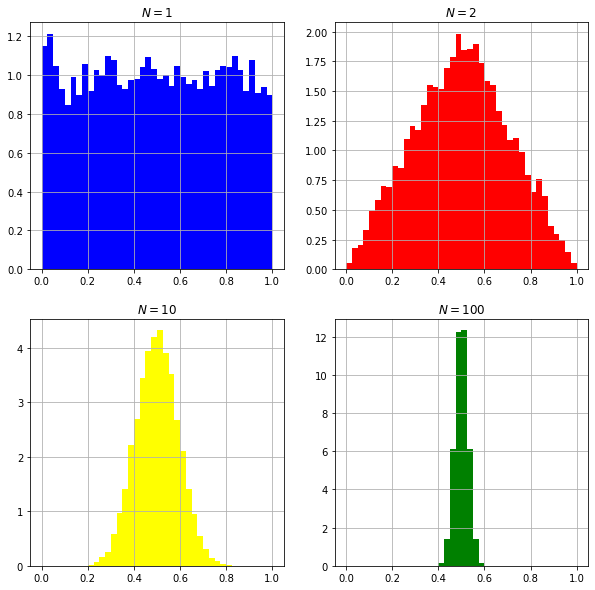

In [18]:
n1, n2, n10, n100 = np.loadtxt("./Esercizio_2/out6", usecols=(1,2,3,4), delimiter=',', unpack='true')
n_bins = 40

fig, ((histo1,histo2), (histo10,histo100)) = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)

histo1.hist(n1, n_bins, density=True, color = 'blue', range=(0,1))
histo2.hist(n2, n_bins, density=True, color = 'red', range=(0,1))
histo10.hist(n10, n_bins, density=True, color = 'yellow', range=(0,1))
histo100.hist(n100, n_bins, density=True, color = 'green', range=(0,1))

histo1.grid(); histo1.set_title('$N = 1$')
histo2.grid(); histo2.set_title('$N = 2$')
histo10.grid(); histo10.set_title('$N = 10$')
histo100.grid(); histo100.set_title('$N = 100$')

plt.show()

### Distribuzione Lorentziana

Nel caso in cui le $N$ variabili indipendenti non abbiano il secondo momento, il teorema del limite centrale, come enunciato sopra, non sarebbe più valido. Tuttavia, la stessa variabile $A_N$ tende comunque ad una distribuzione limite. La distribuzione di Cauchy (o lorentziana), ad esempio, non possiede il secondo momento, che diverge. Se calcoliamo $A_N$ per diversi valori di $N$, scopriamo che la distribuzione limite è ancora la distribuzione di Cauchy. Se la gaussiana è la funzione limite per distribuzioni che possiedono i primi due momenti, la distribuzione di Cauchy è un'altra possibile distribuzione limite per fuzioni che non ce li hanno entrambi. Gaussiana e Lorentziana non esauriscono le possibilità di distribuzioni limite.

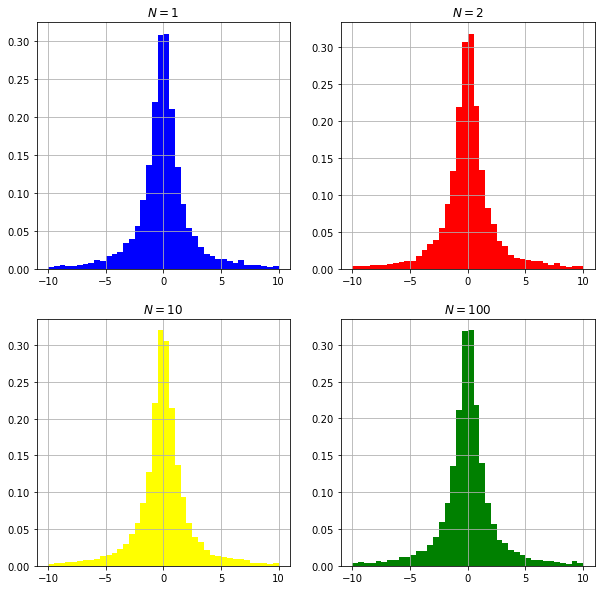

In [20]:
n1, n2, n10, n100 = np.loadtxt("./Esercizio_2/out5", usecols=(1,2,3,4), delimiter=',', unpack='true')
n_bins = 40

fig, ((histo1,histo2), (histo10,histo100)) = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)

histo1.hist(n1, n_bins, density=True, color = 'blue', range=(-10,10))
histo2.hist(n2, n_bins, density=True, color = 'red', range=(-10,10))
histo10.hist(n10, n_bins, density=True, color = 'yellow', range=(-10,10))
histo100.hist(n100, n_bins, density=True, color = 'green', range=(-10,10))

histo1.grid(); histo1.set_title('$N = 1$')
histo2.grid(); histo2.set_title('$N = 2$')
histo10.grid(); histo10.set_title('$N = 10$')
histo100.grid(); histo100.set_title('$N = 100$')

plt.show()

## Esercizio 3

In conclusione di questa esercitazione, simuliamo l'esperimento di Buffon: un ago di lunghezza $L$ viene lanciato casualmente su un piano a righe equispaziate. Sia $d$ la distanza tra le righe, $d>L$, ma non di molto maggiore. L'ago cade sul piano in un punto casuale e in un'orientazione casuale. La probabilità che intersechi una riga è
$$ P = \frac{2L}{\pi d}. $$

Allora, effettuando $N$ lanci, è possibile trovare una stima del pi greco:

$$ \pi = \lim_{N\rightarrow\infty} \frac{2LN}{N_{\text{hit}}d},$$

dove $N_{\text{hit}}$ è il numero di volte in cui l'ago è caduto su una riga.

Simuliamo $M = 10000$ lanci dell'ago, divisi in $N = 100$ blocchi e stimiamo il pi greco. Come sopra, nel grafico è rappresentata la media progressiva delle stime di $\pi$ al variare del numero di blocchi eseguiti.

Stima finale del pi greco: 3.20319 +- 0.0399555


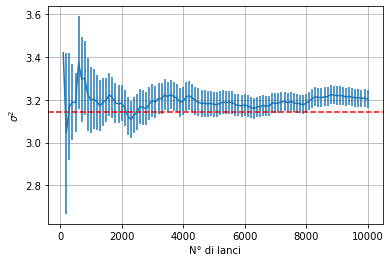

In [21]:
x, f, error = np.loadtxt("./Esercizio_3/out7", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(math.pi, color = 'red', linestyle = 'dashed')
plt.xlabel('N° di lanci')
plt.ylabel('$\sigma^2$')
plt.grid(True)

print("Stima finale del pi greco: " + str(f[-1]) + " +- " + str(error[-1]) )

plt.show()